<a href="https://colab.research.google.com/github/Mobious96/matstat/blob/master/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
Heart Disease UCI

In [0]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
data = pd.read_csv('heart.csv', sep = ',')

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Описание
1. age  
2. sex - (0:f, 1:m)
3. сp (chest pain type)  
Value 1: typical angina  
Value 2: atypical angina  
Value 3: non-anginal pain  
Value 4: asymptomatic  
4. trestbps (resting blood pressure (in mm Hg on admission to the hospital))
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal (Thalium Stress Test Result)  
1 = fixed defect; 2 = normal; 7 = reversable defect
14. target  
0 -> no heart disease
1 -> heart disease  
https://www.kaggle.com/ronitf/heart-disease-uci

In [0]:
data.shape
#Размерность данных

(303, 14)

In [0]:
data.columns
#Названия столбцов

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


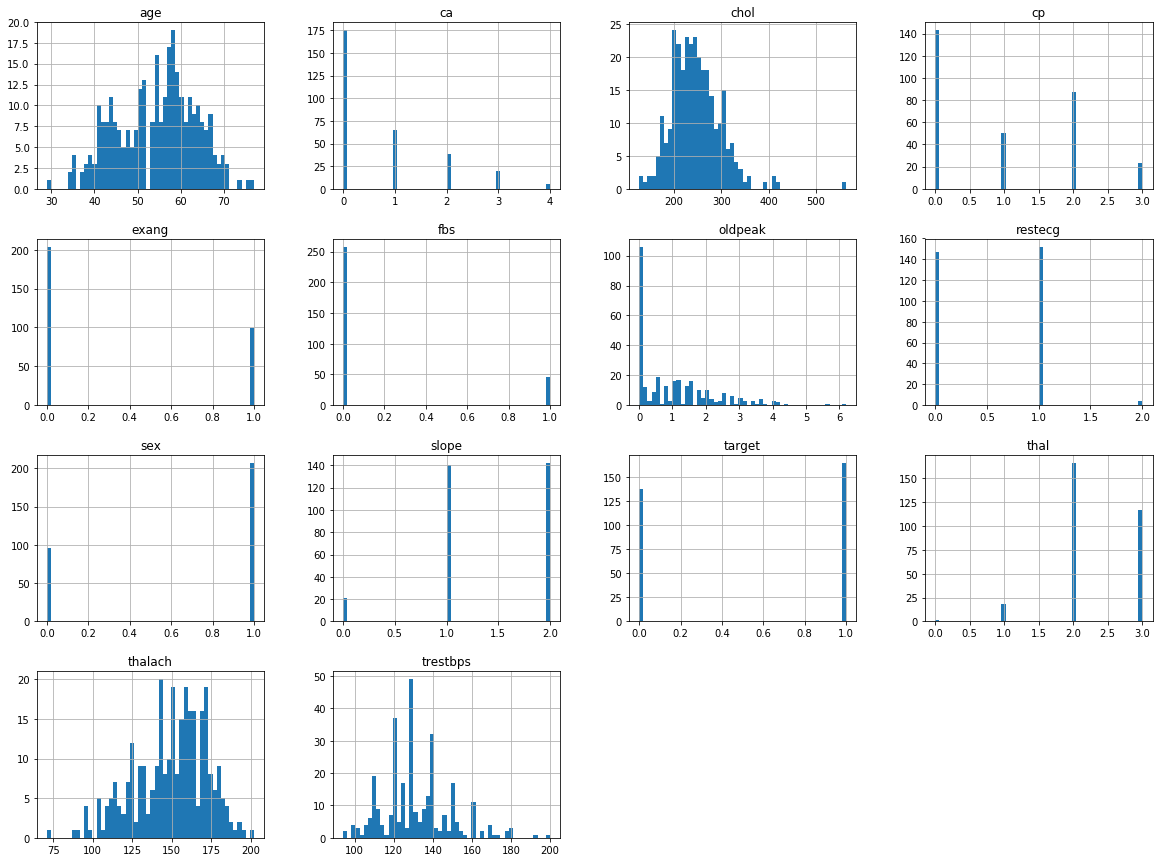

In [0]:
data.hist(bins=50, figsize=(20,15))
plt.show()
#Просмотр данных

In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


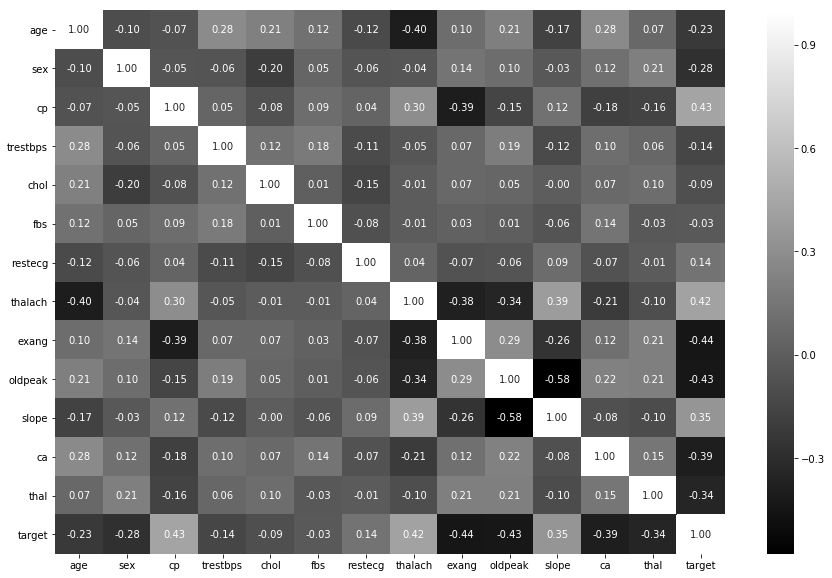

In [0]:
import seaborn
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=plt.cm.gray)
plt.show()
#Матрица ковариации

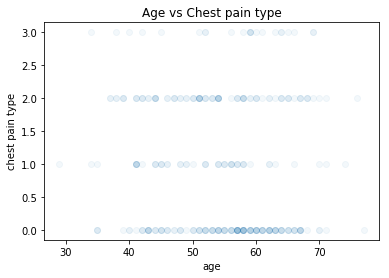

In [0]:
plt.plot(data[data.columns[0]], data['cp'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('chest pain type')
plt.title('Age vs Chest pain type')
pass

In [0]:
data["age"].unique()
#age

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

# Готовим данные

In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Все данные числовые

In [11]:
data[numerical_columns].count(axis = 0)

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

Пропусков в полях нет

In [12]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# X и y

In [0]:
X = data.drop(('target'), axis = 1) # выбрасываем столбец 'target' (имеет болезнь/нет)
y = data['target']
feature_names = X.columns

In [15]:
type(feature_names)

pandas.core.indexes.base.Index

In [16]:
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [17]:
X.shape

(303, 13)

In [18]:
y.shape

(303,)

In [19]:
# Разобьем данные на тренировочную и тестовую части
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

212 91


In [0]:
X_train.shape

(212, 13)

In [0]:
X_test.shape

(91, 13)

# kNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [33]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.30660377358490565 0.3076923076923077


# AdaBoost

In [0]:
from sklearn import ensemble
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.0 0.21978021978021978


# Часть 2

### Подбор параметров для kNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Меньшая ошибка " + str(best_cv_err))
print("Число соседей " + str(best_n_neighbors))

Меньшая ошибка 0.33490566037735847
Число соседей 5


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)
# Несмотря на лучшие результаты параметра, равным 7, по тестовой выборке, на тренировочной результаты хуже. 
# Будем предполагать, что оптимальное значение = 5.

0.25471698113207547 0.32967032967032966


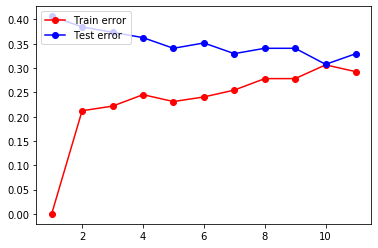

In [35]:
ran_k = range(1, 12)
err_train_mas = []
err_test_mas = []
for k in ran_k:
    mod_k = KNeighborsClassifier(n_neighbors = k)
    mod_k.fit(X_train, y_train)
    err_train_mas.append(np.mean(mod_k.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_k.predict(X_test) != y_test))
plt.plot(ran_k, err_train_mas, 'r-o', label = 'Train error')
plt.plot(ran_k, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

На графике видно, что k=7 имеет меньшую ошибку на тестовой выборке, но большую на тренировочной. Пусть k=5 - оптимально.

### PCA

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)
X_PCA

array([[-1.22673448e+01,  2.87383781e+00],
       [ 2.69013712e+00, -3.98713736e+01],
       [-4.29502141e+01, -2.36368199e+01],
       [-1.09447564e+01, -2.84380358e+01],
       [ 1.06979053e+02, -1.58744678e+01],
       [-5.36472038e+01,  4.00392377e+00],
       [ 4.80821551e+01, -3.03896086e+00],
       [ 1.55660590e+01, -2.62745637e+01],
       [-4.54388962e+01, -7.42977739e+00],
       [-7.73163161e+01, -1.99100759e+01],
       [-6.94323738e+00, -9.17536374e+00],
       [ 2.84259379e+01,  8.47126467e+00],
       [ 1.92477377e+01, -2.24212575e+01],
       [-3.58055558e+01,  5.70343964e+00],
       [ 3.75886896e+01, -1.02579437e+01],
       [-2.79998518e+01, -9.64570379e+00],
       [ 9.29750393e+01, -2.42584272e+01],
       [-1.86307973e+01,  3.92597411e+01],
       [ 1.00245407e+00, -2.10404091e+01],
       [-6.28419048e+00,  2.34469473e+00],
       [-1.19811457e+01, -9.66308502e+00],
       [-1.39453649e+01, -3.05172542e+01],
       [-2.05255102e+01, -2.87200024e+01],
       [-2.

Text(0.5, 1.0, 'components')

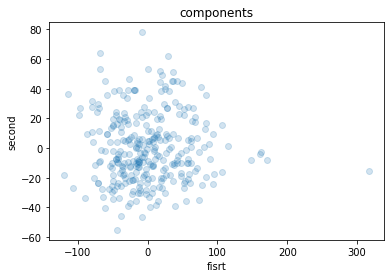

In [58]:
plt.scatter(X_PCA[:,0], X_PCA[:,1], alpha = .2)

plt.xlabel('fisrt')
plt.ylabel('second')
plt.title('components')

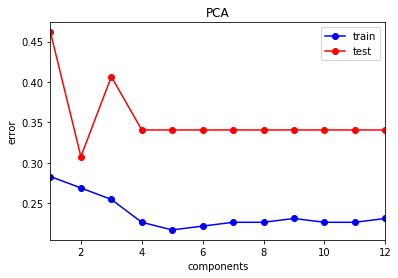

In [59]:
components_arr = np.arange(1, 13) #X.shape(..,13)
test_err = []
train_err = []

for components in components_arr:
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
    knn.fit(X_train, y_train)
    
    train_err.append(np.mean(y_train != knn.predict(X_train)))
    test_err.append(np.mean(y_test  != knn.predict(X_test)))
    

plt.figure()
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
plt.show()

In [60]:
np.min(test_err)

0.3076923076923077

PCA позволил увеличить точность на 3%

In [61]:
for i in range(7):
    print("Count components: " , i + 1, "Error for test sample: " , test_err[i])

Count components:  1 Error for test sample:  0.46153846153846156
Count components:  2 Error for test sample:  0.3076923076923077
Count components:  3 Error for test sample:  0.4065934065934066
Count components:  4 Error for test sample:  0.34065934065934067
Count components:  5 Error for test sample:  0.34065934065934067
Count components:  6 Error for test sample:  0.34065934065934067
Count components:  7 Error for test sample:  0.34065934065934067


Попробуем для k=7

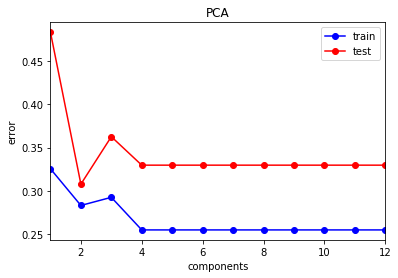

In [66]:
components_arr = np.arange(1, 13) #X.shape(..,13)
test_err = []
train_err = []

for components in components_arr:
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train)
    
    train_err.append(np.mean(y_train != knn.predict(X_train)))
    test_err.append(np.mean(y_test  != knn.predict(X_test)))
    

plt.figure()
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
plt.show()

In [67]:
for i in range(7):
    print("Count components: " , i + 1, "Error for test sample: " , test_err[i])

Count components:  1 Error for test sample:  0.4835164835164835
Count components:  2 Error for test sample:  0.3076923076923077
Count components:  3 Error for test sample:  0.3626373626373626
Count components:  4 Error for test sample:  0.32967032967032966
Count components:  5 Error for test sample:  0.32967032967032966
Count components:  6 Error for test sample:  0.32967032967032966
Count components:  7 Error for test sample:  0.32967032967032966


Вывод: метод главных компонент позволил уменьшить ошибку приблизительно на 3% при числе главных компонент равным 2.